# Regression(Lesson 3)
## Polynominal Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
# Use this to show matplotlib and plots properly(But no essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [2]:
Data_Frame = pd.read_csv('Fuel_Consumption.csv')

In [3]:
Data_Frame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
Clear_Data_Frame = Data_Frame[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
Clear_Data_Frame.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


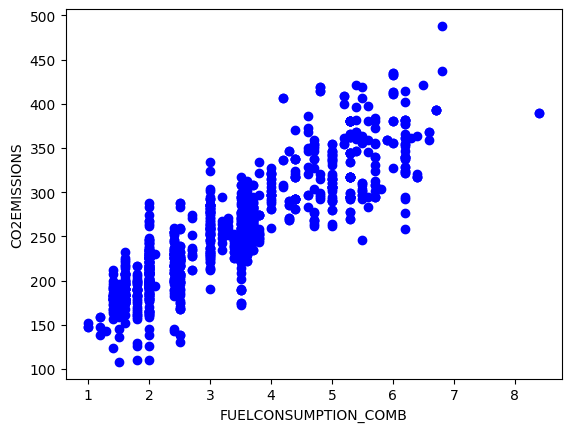

In [6]:
plt.scatter(Clear_Data_Frame.ENGINESIZE,Clear_Data_Frame.CO2EMISSIONS,
           color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
Mask = np.random.rand(len(Data_Frame)) < 0.8
Train = Clear_Data_Frame[Mask]
Test = Clear_Data_Frame[~Mask]

### Create and run your model

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
# Convert our data to normal arrays
Train_x = np.asanyarray(Train[['ENGINESIZE']])
Train_y = np.asanyarray(Train[['CO2EMISSIONS']])

Test_x = np.asanyarray(Test[['ENGINESIZE']])
Test_y = np.asanyarray(Test[['CO2EMISSIONS']])
# Our initial inputs
print(Train_x[:3])
# Creat a matrix from our inputs by powering them to 2
Polynominal = PolynomialFeatures(degree=2)
Train_x_polynominal = Polynominal.fit_transform(Train_x)
Train_x_polynominal

[[2. ]
 [2.4]
 [1.5]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]], shape=(851, 3))

In [9]:
model = linear_model.LinearRegression()
predicted_y =model.fit(Train_x_polynominal,Train_y)
print('Co-eficient2(for x to the power of 1) :',model.coef_[0][1])
print('Co-eficient3(for x to the power of 2) :',model.coef_[0][2])
# whrere the line starts
print('Intercept : ',model.intercept_[0])

Co-eficient2(for x to the power of 1) : 53.20026221712788
Co-eficient3(for x to the power of 2) : -1.840981157766059
Intercept :  103.23203231468852


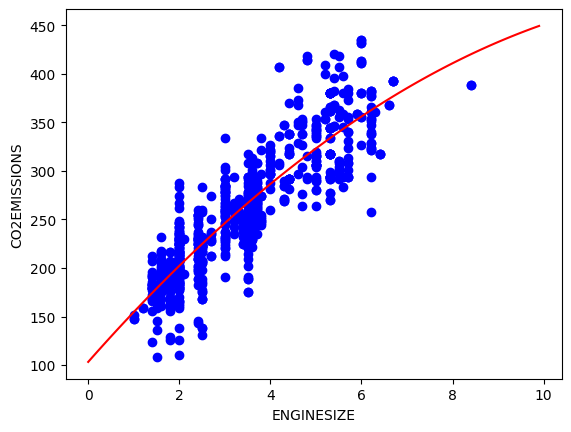

In [10]:
plt.scatter(Train.ENGINESIZE,Train.CO2EMISSIONS,color='blue')
# for x axis from 0 to 10 by the distance of 0.1
xx = np.arange(0,10,0.1)
yy = model.intercept_[0] + model.coef_[0][1]*xx + model.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Evaluate the accuracy of the model

In [11]:
from sklearn.metrics import r2_score
Test_x_polynominal = Polynominal.fit_transform(Test_x)
Predicted_y = model.predict(Test_x_polynominal)
print('Means absolute error : %.2f'% np.mean(np.absolute(Predicted_y - Test_y)))
print('Residual sum of mean squares(MSE) : %.2f'% np.mean((Predicted_y - Test_y)**2))
print('R2-score : %.2f'% r2_score(Predicted_y,Test_y))

Means absolute error : 23.73
Residual sum of mean squares(MSE) : 1004.10
R2-score : 0.65
